In [1]:
#Mugdha Arvind
#Codsoft internship task 2

In [ ]:
'''TASK 3 - IRIS FLOWER CLASSIFICATION

-The Iris flower dataset consists of three species: setosa, versicolor,
and virginica. These species can be distinguished based on their
measurements. Now, imagine that you have the measurements
of Iris flowers categorized by their respective species. Your
objective is to train a machine learning model that can learn from
these measurements and accurately classify the Iris flowers into
their respective species.

-Use the Iris dataset to develop a model that can classify iris
flowers into different species based on their sepal and petal
measurements. This dataset is widely used for introductory
classification tasks.'''

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
#Loading the dataset

In [3]:
data=pd.read_csv("IRIS.csv")
#dataset from https://www.kaggle.com/datasets/arshid/iris-flower-dataset

In [4]:
data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
data.tail(10)

,sepal_length,sepal_width,petal_length,petal_width,species
140,6.7,3.1,5.6,2.4,Iris-virginica
141,6.9,3.1,5.1,2.3,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica
143,6.8,3.2,5.9,2.3,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
data.shape

(150, 5)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
#Handling Null values

In [11]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [12]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [13]:
#Analysis

<Axes: >

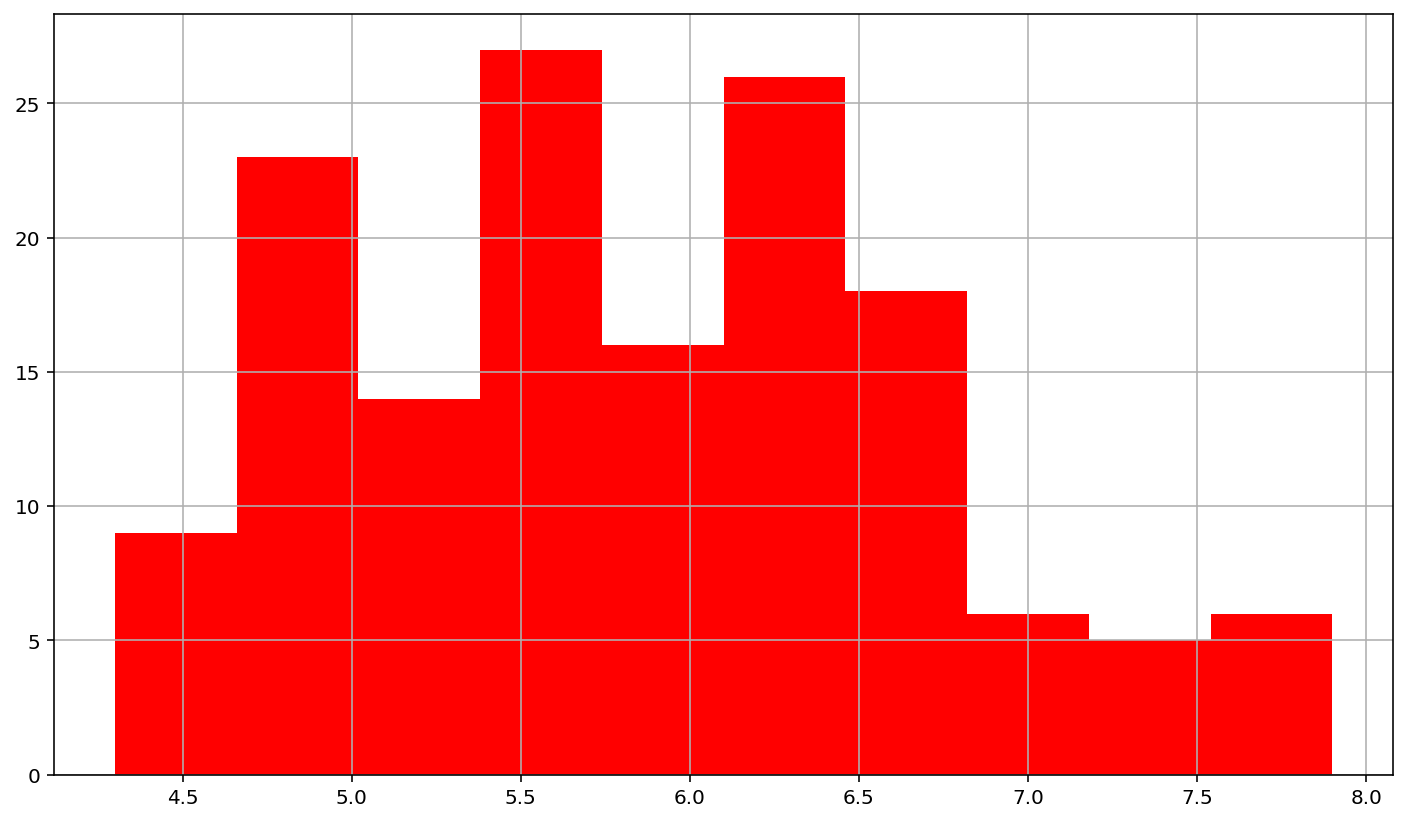

In [14]:
data['sepal_length'].hist(color='red')

<Axes: >

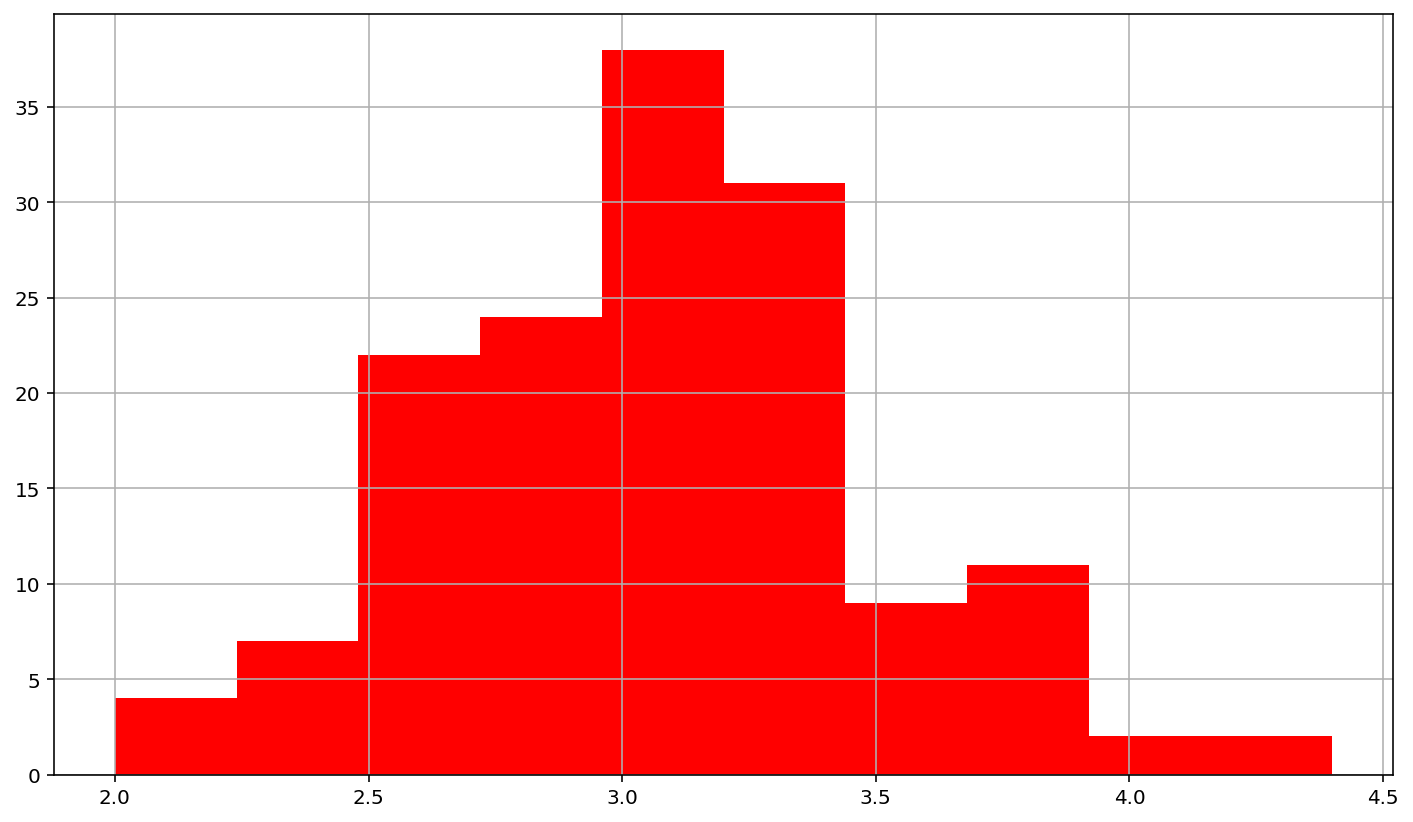

In [15]:
data['sepal_width'].hist(color='red')

<Axes: >

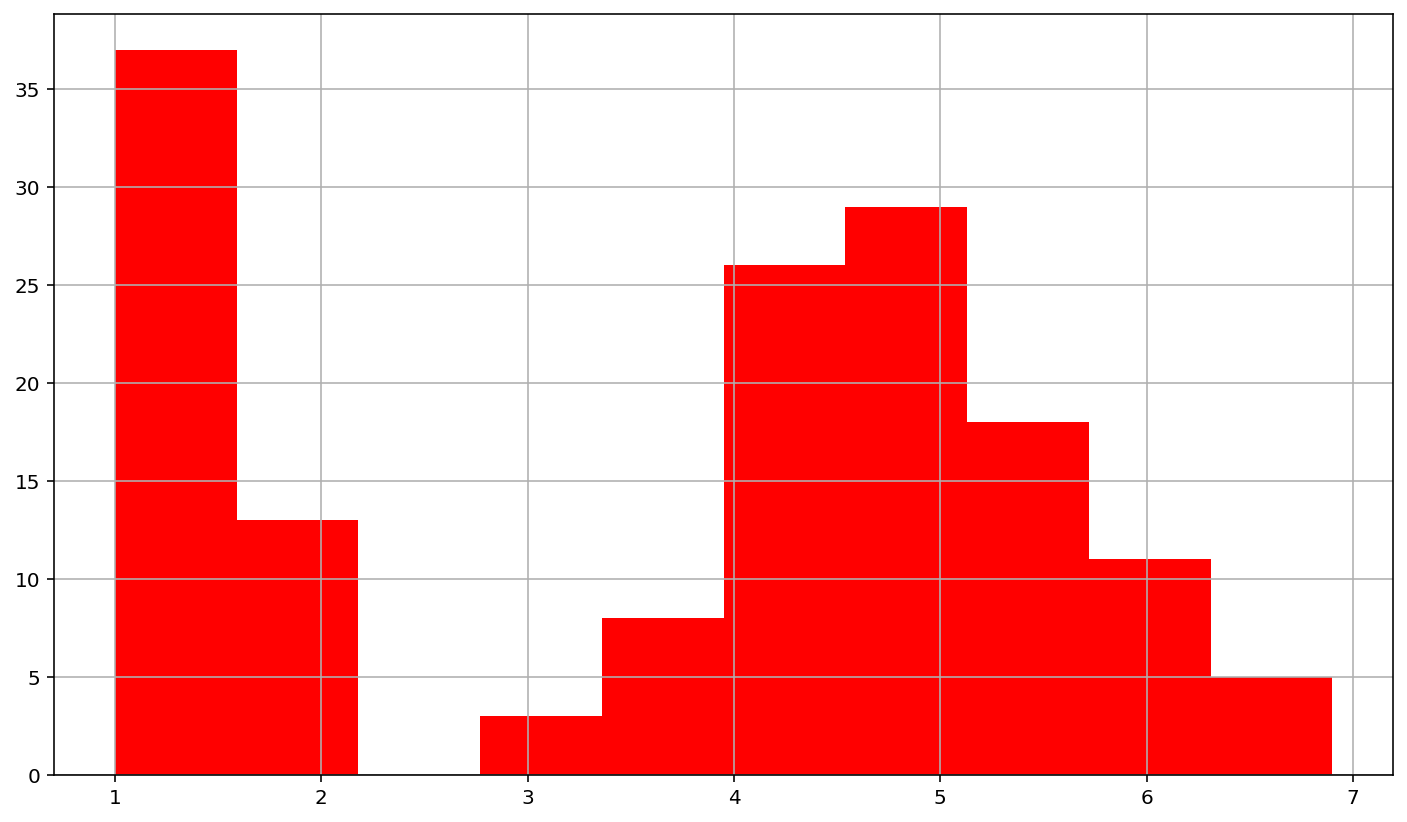

In [16]:
data['petal_length'].hist(color='red')

<Axes: >

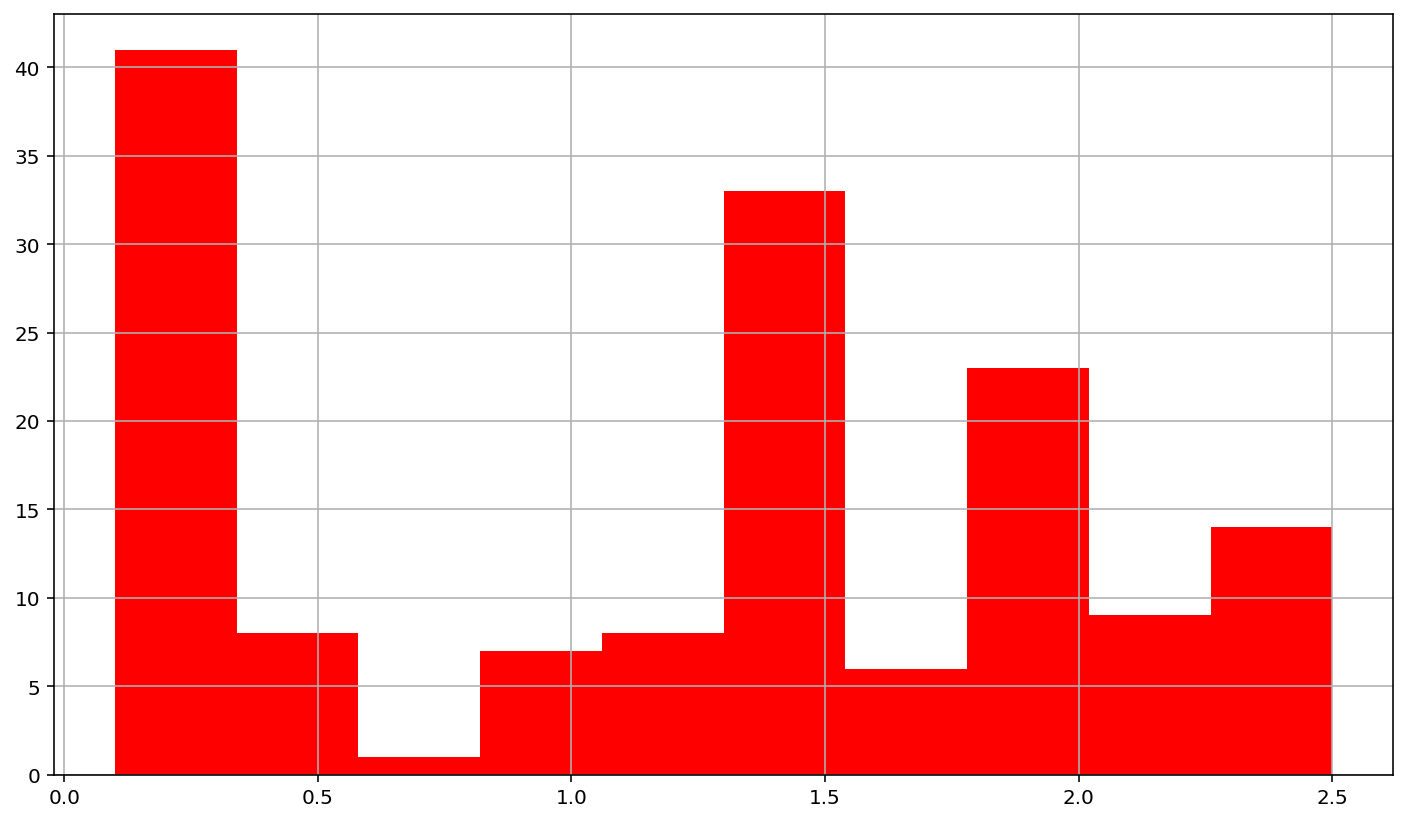

In [17]:
data['petal_width'].hist(color='red')

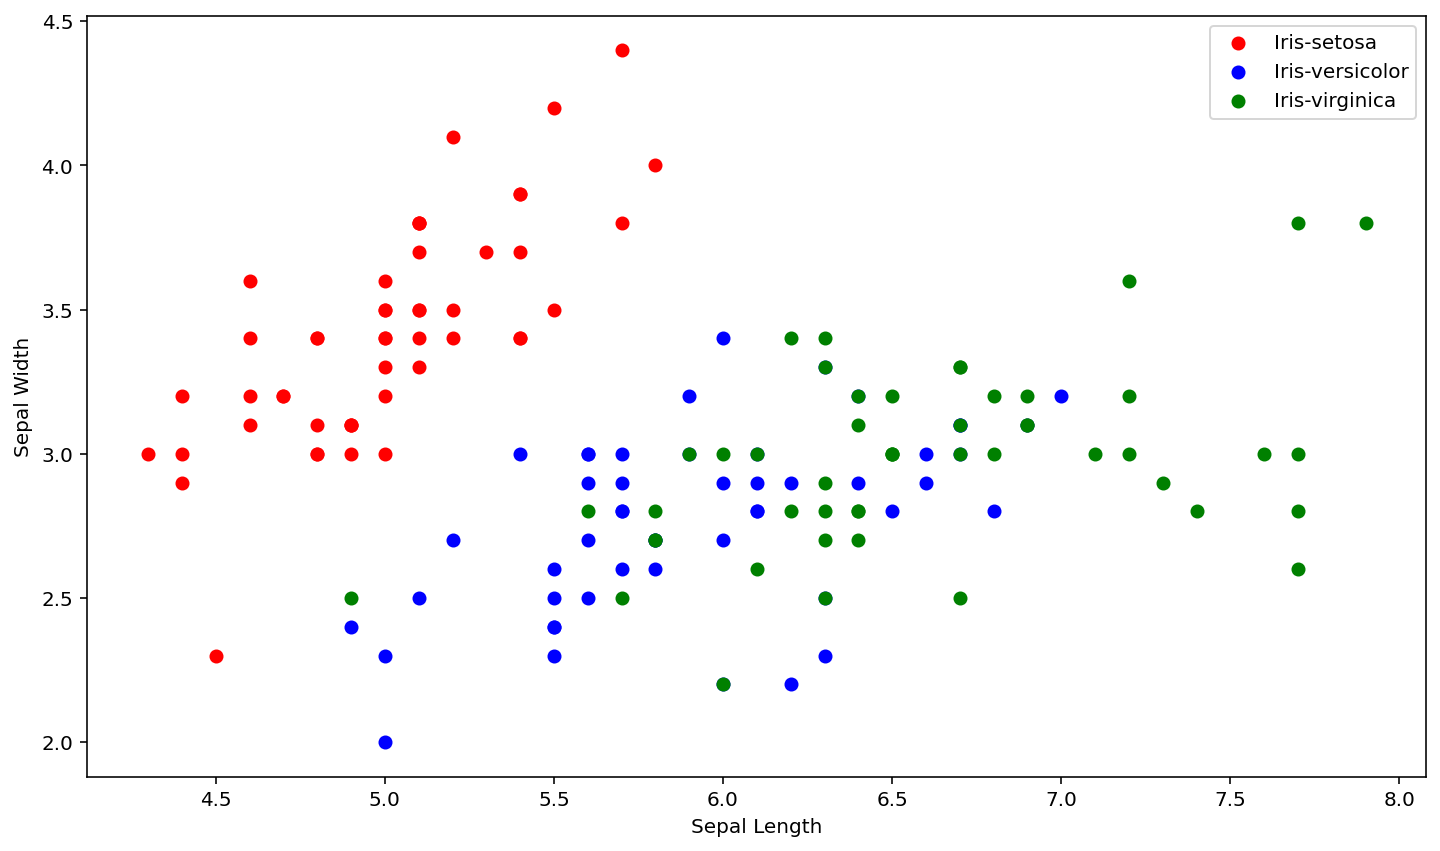

In [18]:
colors=['red','blue','green']
species=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
for i in range(3):
    x=data[data['species']==species[i]]
    plt.scatter(x['sepal_length'],x['sepal_width'],c=colors[i],label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

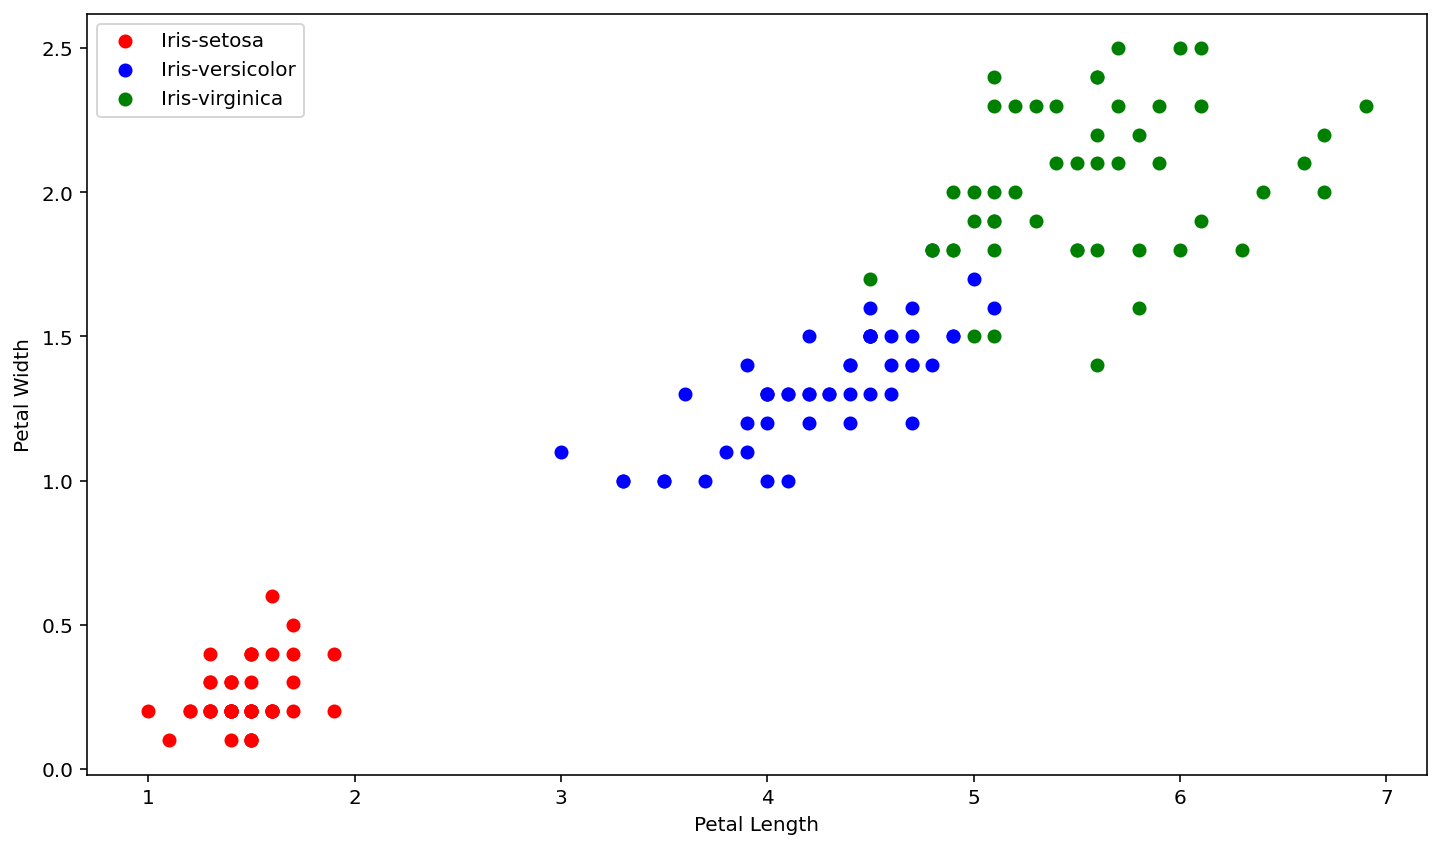

In [19]:
for i in range(3):
    x=data[data['species']==species[i]]
    plt.scatter(x['petal_length'],x['petal_width'],c=colors[i],label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

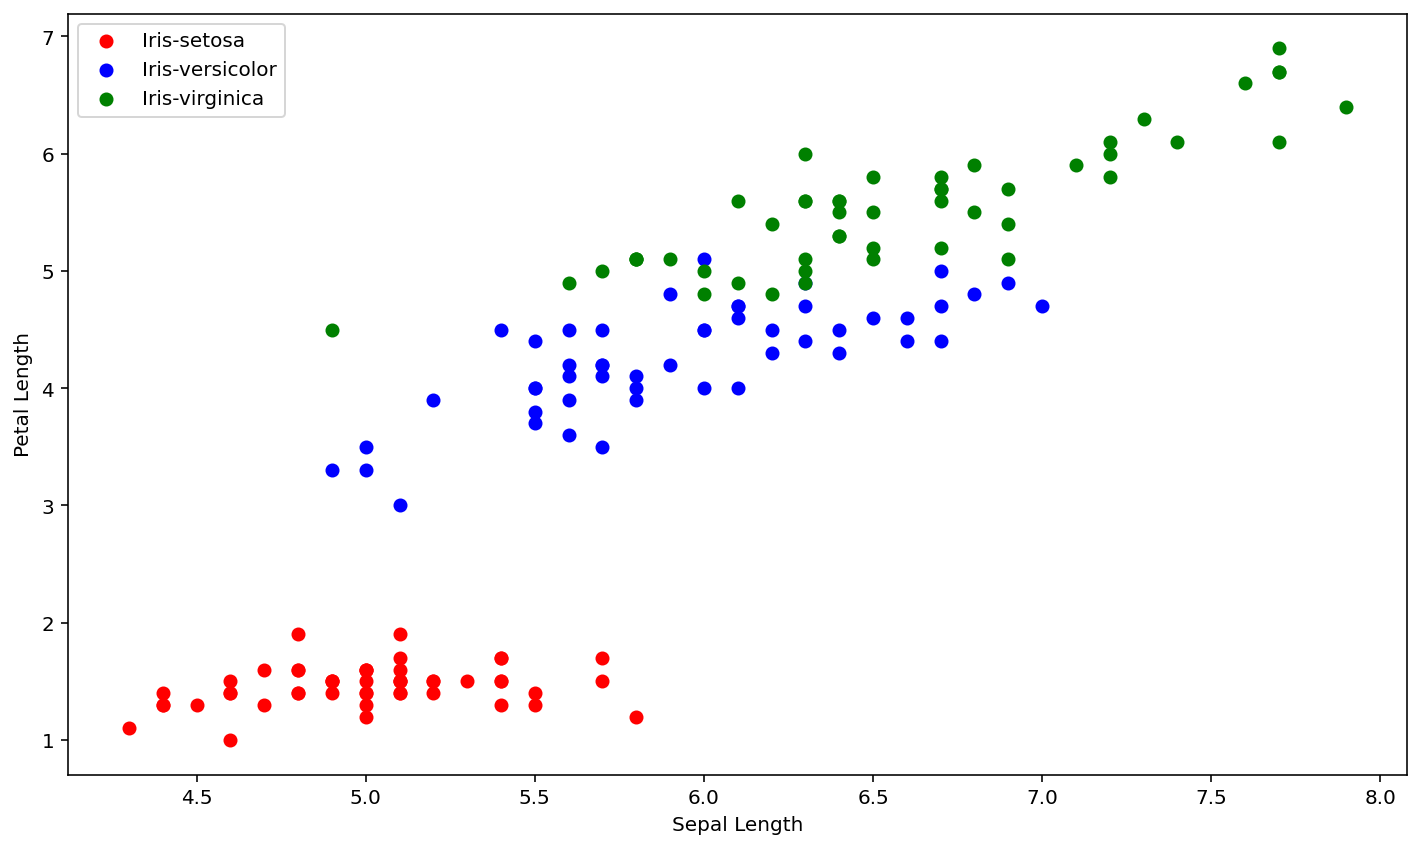

In [20]:
for i in range(3):
    x=data[data['species']==species[i]]
    plt.scatter(x['sepal_length'],x['petal_length'],c=colors[i],label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

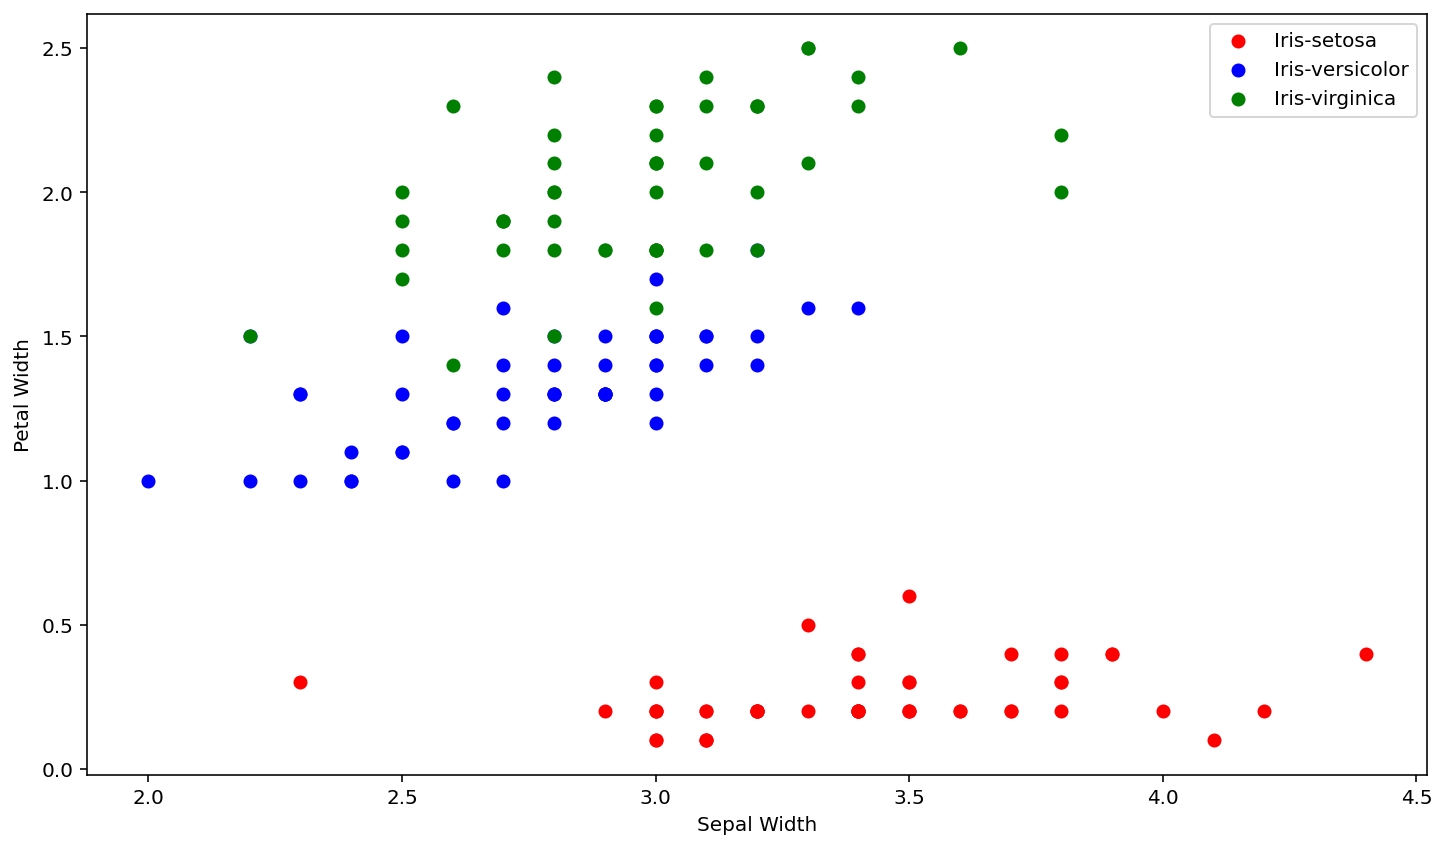

In [21]:
for i in range(3):
    x=data[data['species']==species[i]]
    plt.scatter(x['sepal_width'],x['petal_width'],c=colors[i],label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

<Axes: >

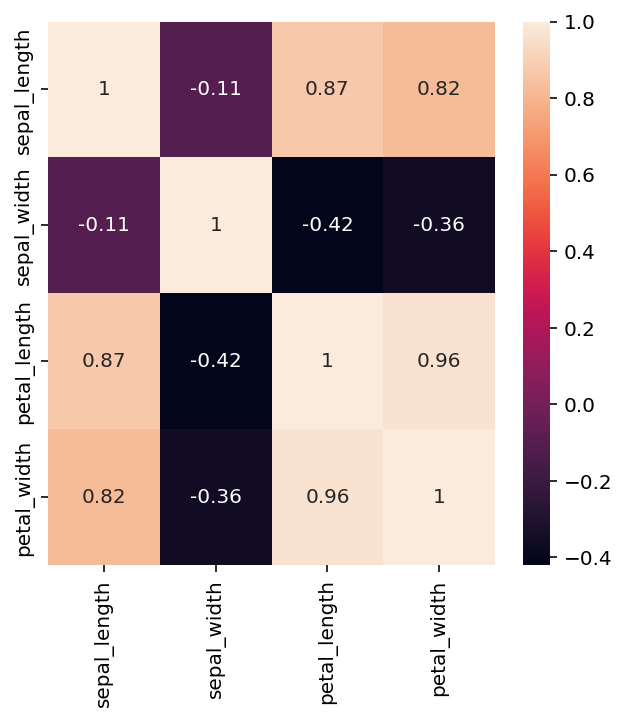

In [22]:
numeric_columns=data.drop(columns='species')
corr=numeric_columns.corr()
fig,axis=plt.subplots(figsize=(5,5))
sns.heatmap(corr,annot=True,ax=axis)

In [23]:
le=LabelEncoder()
data['species']=le.fit_transform(data['species'])
data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [24]:
#model

In [25]:
x=data.drop(columns='species')
y=data['species']

In [26]:
#splitting
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [27]:
LR=LogisticRegression()
LR.fit(x_train,y_train)

LogisticRegression()

In [28]:
KNN=KNeighborsClassifier()
KNN.fit(x_train,y_train)

KNeighborsClassifier()

In [29]:
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)

DecisionTreeClassifier()

In [30]:
LR_accuracy=LR.score(x_test,y_test)*100
KNN_accuracy=KNN.score(x_test,y_test)*100
DT_accuracy=DT.score(x_test,y_test)*100

In [31]:
print(f"Accuracy by using Logistic Regression: {LR_accuracy}%")

Accuracy by using Logistic Regression: 93.33333333333333%


In [32]:
print(f"Accuracy by using K Nearest Neighbors Algorithm: {KNN_accuracy}%")

Accuracy by using K Nearest Neighbors Algorithm: 95.55555555555556%


In [33]:
print(f"Accuracy by using Decision Tree Classifier: {DT_accuracy}%")

Accuracy by using Decision Tree Classifier: 93.33333333333333%
